## **Project Title**  : Sales Prediction of Super Store

| Name | Student Id |
|:-:|:-:|
| Bhargav Parekh| W0775934|

## Library

In [ ]:
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

In [ ]:
#Read File
#super_store = pd.read_csv('C:/Users/HP/Downloads/Marketing/train.csv')
super_store = pd.read_csv('/content/drive/MyDrive/train - Copy.csv')

### Data Overview

In [ ]:
#Find the shape
super_store.shape

(9800, 18)

In [ ]:
print ("Rows     : " ,super_store.shape[0])
print ("Columns  : " ,super_store.shape[1])
print ("\nFeatures : \n" ,super_store.columns.tolist())
print ("\nUnique values :  \n",super_store.nunique())


Rows     :  9800
Columns  :  18

Features : 
 ['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Sales']

Unique values :  
 Row ID           9800
Order ID         4922
Order Date       1230
Ship Date        1326
Ship Mode           4
Customer ID       793
Customer Name     793
Segment             3
Country             1
City              529
State              49
Postal Code       626
Region              4
Product ID       1861
Category            3
Sub-Category       17
Product Name     1849
Sales            5757
dtype: int64


In [ ]:
#Quick view of the dataset
super_store.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [ ]:
super_store.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [ ]:
super_store = super_store.replace(" ", np.NaN)
super_store.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [ ]:
super_store.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

### Data Cleaning

In [ ]:
missing_data = super_store.isnull()

In [ ]:
# Count missing values
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("") 


Row ID
False    9800
Name: Row ID, dtype: int64

Order ID
False    9800
Name: Order ID, dtype: int64

Order Date
False    9800
Name: Order Date, dtype: int64

Ship Date
False    9800
Name: Ship Date, dtype: int64

Ship Mode
False    9800
Name: Ship Mode, dtype: int64

Customer ID
False    9800
Name: Customer ID, dtype: int64

Customer Name
False    9800
Name: Customer Name, dtype: int64

Segment
False    9800
Name: Segment, dtype: int64

Country
False    9800
Name: Country, dtype: int64

City
False    9800
Name: City, dtype: int64

State
False    9800
Name: State, dtype: int64

Postal Code
False    9789
True       11
Name: Postal Code, dtype: int64

Region
False    9800
Name: Region, dtype: int64

Product ID
False    9800
Name: Product ID, dtype: int64

Category
False    9800
Name: Category, dtype: int64

Sub-Category
False    9800
Name: Sub-Category, dtype: int64

Product Name
False    9800
Name: Product Name, dtype: int64

Sales
False    9800
Name: Sales, dtype: int64



### Work with the postal code Column


In [ ]:
#Replacing spaces with null values in total charges column
super_store["Postal Code"] = super_store["Postal Code"].replace(" ",np.nan)


In [ ]:
missing_data = super_store.isnull()

In [ ]:
# Count missing values
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("") 

Row ID
False    9800
Name: Row ID, dtype: int64

Order ID
False    9800
Name: Order ID, dtype: int64

Order Date
False    9800
Name: Order Date, dtype: int64

Ship Date
False    9800
Name: Ship Date, dtype: int64

Ship Mode
False    9800
Name: Ship Mode, dtype: int64

Customer ID
False    9800
Name: Customer ID, dtype: int64

Customer Name
False    9800
Name: Customer Name, dtype: int64

Segment
False    9800
Name: Segment, dtype: int64

Country
False    9800
Name: Country, dtype: int64

City
False    9800
Name: City, dtype: int64

State
False    9800
Name: State, dtype: int64

Postal Code
False    9789
True       11
Name: Postal Code, dtype: int64

Region
False    9800
Name: Region, dtype: int64

Product ID
False    9800
Name: Product ID, dtype: int64

Category
False    9800
Name: Category, dtype: int64

Sub-Category
False    9800
Name: Sub-Category, dtype: int64

Product Name
False    9800
Name: Product Name, dtype: int64

Sales
False    9800
Name: Sales, dtype: int64



In [ ]:
#Dropping null values from total charges column which contain .15% missing data 
super_store = super_store[super_store["Postal Code"].notnull()]
super_store = super_store.reset_index()[super_store.columns]

#convert to float type
super_store["Postal Code"] = super_store["Postal Code"].astype(float)


### Plotting

## How many Region data in this dataset ? 

In [ ]:
region_count =  super_store['Region'].value_counts(ascending=True)
region_count

South      1598
Central    2277
East       2774
West       3140
Name: Region, dtype: int64

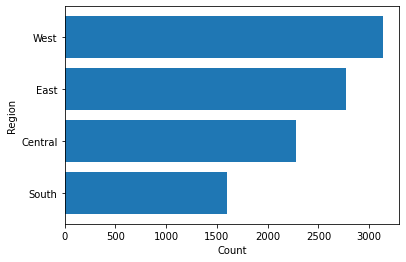

In [ ]:
fig, ax = plt.subplots()

bars = ax.barh(range(len(region_count)),
              region_count)
ax.set_frame_on(True)
ax.set_yticks(range(len(region_count)))
ax.set_yticklabels(region_count.index)
ax.set_xlabel('Count')
ax.set_ylabel('Region')


plt.show()

## How many segment in this dataset ?

In [ ]:
segment_count =  super_store['Segment'].value_counts()
segment_count

Consumer       5096
Corporate      2948
Home Office    1745
Name: Segment, dtype: int64

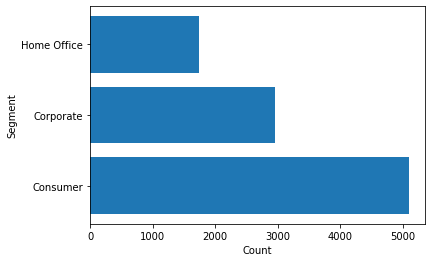

In [ ]:
fig, ax = plt.subplots()

bars = ax.barh(range(len(segment_count)),
              segment_count)
ax.set_frame_on(True)
ax.set_yticks(range(len(segment_count)))
ax.set_yticklabels(segment_count.index)
#ax.set_title('Segment')
ax.set_xlabel('Count')
ax.set_ylabel('Segment')


plt.show()

## Rename column names

In [ ]:
super_store.rename(columns={'Row ID':'Row_ID',
                 'Order ID':'Order_ID',
                'Order Date':'Order_Date',
                 'Ship Date':'Ship_Date',
                  'Ship Mode':'Ship_Mode',
                  'Customer ID':'Customer_ID',
                  'Customer Name':'Customer_Name',
                   'Postal Code':'Postal_Code',
                   'Product ID':'Product_ID',
                   'Sub-Category':'Sub_Category',
                  'Product Name':'Product_Name'}, inplace=True)

In [ ]:
super_store['Order_Date']=pd.to_datetime(super_store['Order_Date'])

### Change Data type of Sales

In [ ]:
super_store['Sales'] = super_store.Sales.astype('int')

In [ ]:
super_store.Sales.describe()

count     9789.000000
mean       229.525590
std        625.278584
min          0.000000
25%         17.000000
50%         54.000000
75%        210.000000
max      22638.000000
Name: Sales, dtype: float64

## How many category in Super Store Dataset ?

In [ ]:
super_store.Category.value_counts()

Office Supplies    5903
Furniture          2076
Technology         1810
Name: Category, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


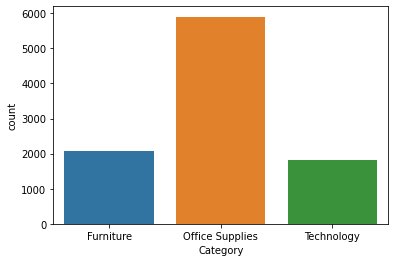

In [ ]:
sns.countplot(super_store['Category'])

## How many sub-Category in Super Store Dataset ?

In [ ]:
 sub = super_store.Sub_Category.value_counts()

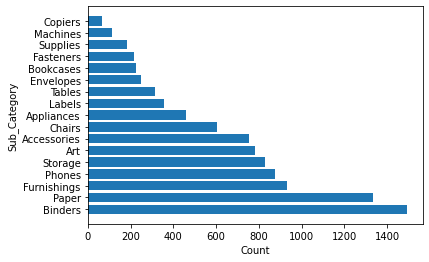

In [ ]:
fig, ax = plt.subplots()

bars = ax.barh(range(len(sub)),
              sub)
ax.set_frame_on(True)
ax.set_yticks(range(len(sub)))
ax.set_yticklabels(sub.index)
#ax.set_title('Segment')
ax.set_xlabel('Count')
ax.set_ylabel('Sub_Category')


plt.show()

## Category and Sub-category Sales 

In [ ]:
d = super_store.groupby(['Category','Sub_Category']).agg({'Sales': sum})
d

Sales
Category        Sub_Category        
Furniture       Bookcases     109258
                Chairs        321760
                Furnishings    88692
                Tables        202646
Office Supplies Appliances    103813
                Art            26270
                Binders       199225
                Envelopes      15980
                Fasteners       2894
                Labels         12159
                Paper          75953
                Storage       217312
                Supplies       46322
Technology      Accessories   163371
                Copiers       146184
                Machines      189155
                Phones        325832

### Top-10 City by Sales

In [ ]:
city = super_store.groupby('City').sum().sort_values('Sales', ascending=False)
city = city[['Sales']]
top_10 = city.head(10).reset_index()
top_10

,City,Sales
0,New York City,251912
1,Los Angeles,172992
2,Seattle,115847
3,San Francisco,108735
4,Philadelphia,108541
5,Houston,63753
6,Chicago,47652
7,San Diego,47420
8,Jacksonville,44648
9,Detroit,42370


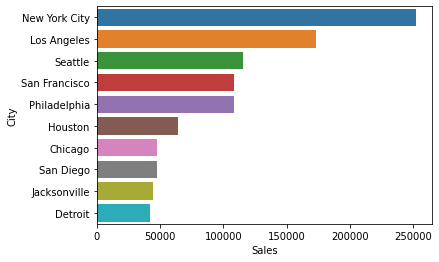

In [ ]:
sns.barplot(x = "Sales", y = "City", data = top_10)

### Top-10 State by Sales

In [ ]:
state = super_store.groupby('State').agg({'Sales' : sum}).sort_values(by = 'Sales', ascending=False)
state = state[['Sales']]
top_010 = state.head(10).reset_index()
top_010

,State,Sales
0,California,445142
1,New York,305681
2,Texas,168037
3,Washington,134899
4,Pennsylvania,115948
5,Florida,88229
6,Illinois,78976
7,Michigan,75967
8,Ohio,74878
9,Virginia,70500


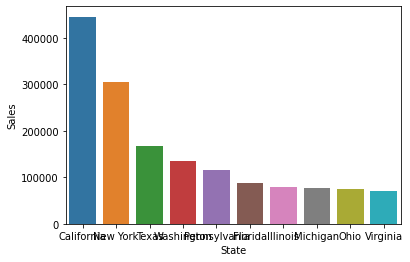

In [ ]:
sns.barplot(x = 'State', y = 'Sales', data = top_010)

## Ship mode used by Superstore for Sale Products.

In [ ]:
ship_m = super_store.groupby('Ship_Mode').agg({'Sales' : sum})
ship_m = ship_m[['Sales']].reset_index()
ship_m

,Ship_Mode,Sales
0,First Class,344671
1,Same Day,124907
2,Second Class,448054
3,Standard Class,1329194


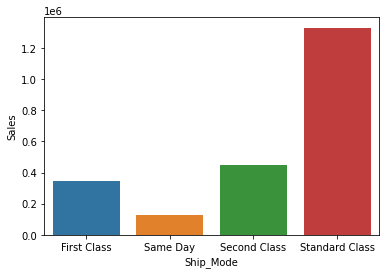

In [ ]:
sns.barplot(y = 'Sales', x = 'Ship_Mode', data = ship_m)

## Convert Date into Date Format 

In [ ]:
super_store['Order_Date'] = pd.to_datetime(super_store['Order_Date'])
super_store['Order_Date']

0      2017-08-11
1      2017-08-11
2      2017-12-06
3      2016-11-10
4      2016-11-10
          ...    
9784   2017-05-21
9785   2016-12-01
9786   2016-12-01
9787   2016-12-01
9788   2016-12-01
Name: Order_Date, Length: 9789, dtype: datetime64[ns]

In [ ]:
super_store['Ship_Date'] = pd.to_datetime(super_store['Ship_Date'])
super_store['Ship_Date']

0      2017-11-11
1      2017-11-11
2      2017-06-16
3      2016-10-18
4      2016-10-18
          ...    
9784   2017-05-28
9785   2016-01-17
9786   2016-01-17
9787   2016-01-17
9788   2016-01-17
Name: Ship_Date, Length: 9789, dtype: datetime64[ns]

## Convert Order date into Month

In [ ]:
super_store['Order_Month'] = super_store['Order_Date'].dt.month_name()
super_store['Order_Month']

0         August
1         August
2       December
3       November
4       November
          ...   
9784         May
9785    December
9786    December
9787    December
9788    December
Name: Order_Month, Length: 9789, dtype: object

## Convert Date into Year

In [ ]:
super_store['Order_Year'] = super_store['Order_Date'].dt.year
super_store['Order_Year']

0       2017
1       2017
2       2017
3       2016
4       2016
        ... 
9784    2017
9785    2016
9786    2016
9787    2016
9788    2016
Name: Order_Year, Length: 9789, dtype: int64

## Sales by Month

In [ ]:
sales_month = super_store.groupby('Order_Month').agg({'Sales' : sum}).sort_values(by = 'Sales')
sales_month

,Sales
Order_Month,
February,130832
June,140336
April,142578
January,153335
July,158316
May,165326
October,183375
August,202735
March,211796


Text(0, 0.5, 'Sales')

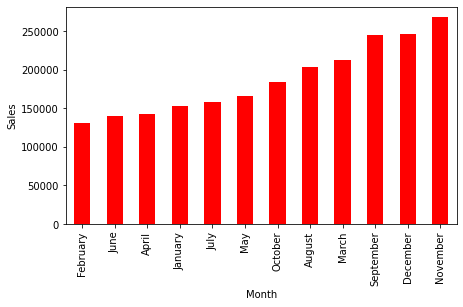

In [ ]:
sales_month.plot.bar(figsize=(7,4),legend=None, color  = 'red')
plt.xlabel("Month")
plt.ylabel("Sales")

## Sales by Yearly 

In [ ]:
ms = super_store.groupby(by = ['Order_Year', 'Order_Month']).sum()
ms1 = ms.reset_index()
ms1

,Order_Year,Order_Month,Row_ID,Postal_Code,Sales
0,2015,April,529043,6742525.0,24638
1,2015,August,677006,8985105.0,37261
2,2015,December,1165661,14365842.0,63433
3,2015,February,467411,4650593.0,12535
4,2015,January,525678,6736108.0,28753
5,2015,July,849173,9800364.0,35097
6,2015,June,575170,6925948.0,29102
7,2015,March,822337,8250689.0,53938
8,2015,May,739544,7074424.0,29434
9,2015,November,1250752,14851968.0,64210


In [ ]:
ms1['Order_Month'] =  ms1.Order_Month.apply(lambda x : x[:3])
ms = ms1.groupby(by = ['Order_Year','Order_Month']).sum()['Sales']
ms

Order_Year  Order_Month
2015        Apr            24638
            Aug            37261
            Dec            63433
            Feb            12535
            Jan            28753
            Jul            35097
            Jun            29102
            Mar            53938
            May            29434
            Nov            64210
            Oct            34472
            Sep            65822
2016        Apr            37961
            Aug            44573
            Dec            52749
            Feb            20668
            Jan            29292
            Jul            27782
            Jun            28425
            Mar            34403
            May            30671
            Nov            49842
            Oct            31539
            Sep            65193
2017        Apr            42258
            Aug            45631
            Dec            72695
            Feb            48833
            Jan            36287
            Jul    

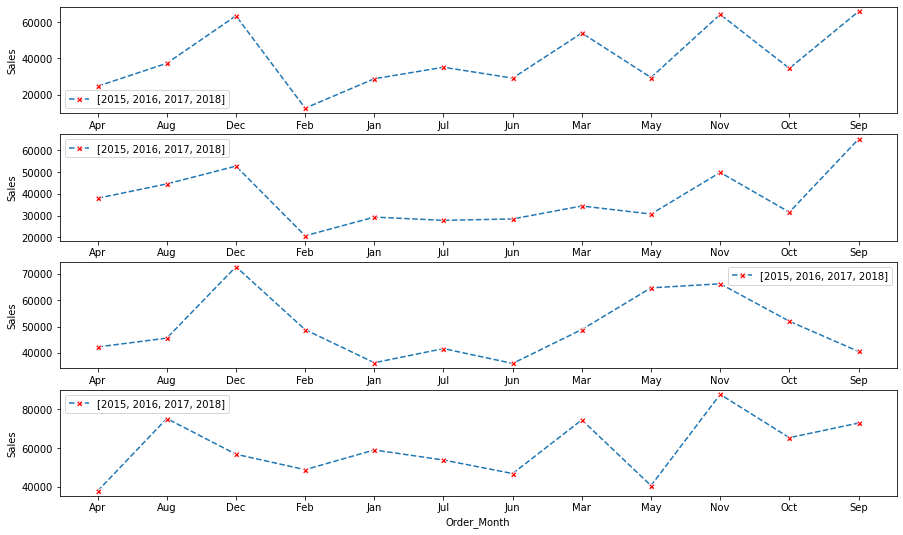

In [ ]:
fig, ax  =  plt.subplots(nrows = 4 , ncols = 1, figsize = (15,9))

yr = [2015,2016,2017,2018]
for i in range(4):
    y = yr[i]
    ms1 = ms.loc[y]
    ax[i] = sns.lineplot(x  =  ms1.index, y= ms1.values, data = ms1, ax= ax[i], label = yr,linestyle='dashed', marker = "X", markerfacecolor='red')
    ax[i].set_ylabel('Sales')
plt.show()

### Preprocessing

In [ ]:
super_store.head()

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,State,Postal_Code,Region,Product_ID,Category,Sub_Category,Product_Name,Sales,Order_Month,Order_Year
0,1,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261,August,2017
1,2,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731,August,2017
2,3,CA-2017-138688,2017-12-06,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14,December,2017
3,4,US-2016-108966,2016-11-10,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957,November,2016
4,5,US-2016-108966,2016-11-10,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22,November,2016


## Date encodes and Category data Encode by One HotEncode

In [ ]:
def encode_dates(super_store, column):
    super_store = super_store.copy()
    super_store[column] = pd.to_datetime(super_store[column])
    super_store[column + '_year'] = super_store[column].apply(lambda x: x.year)
    super_store[column + '_month'] = super_store[column].apply(lambda x: x.month)
    super_store[column + '_day'] = super_store[column].apply(lambda x: x.day)
    super_store = super_store.drop(column, axis=1)
    return super_store

def onehot_encode(super_store, column):
    super_store = super_store.copy()
    dummies = pd.get_dummies(super_store[column], prefix=column)
    super_store = pd.concat([super_store, dummies], axis=1)
    super_store = super_store.drop(column, axis=1)
    return super_store

## Drop unnecessary colomns and Split Train and test

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
def preprocess_inputs(df):
    df = df.copy()
    
    # Drop unnecessary columns
    df = df.drop(['Row_ID', 'Customer_Name', 'Country', 'Product_Name'], axis=1)
    df = df.drop(['Order_Month'], axis = 1)
    
    # Drop customer-specific feature columns
    df = df.drop(['Order_ID', 'Customer_ID'], axis=1)
    
    # Extract date features
    df = encode_dates(df, column='Order_Date')
    df = encode_dates(df, column='Ship_Date')
    
    # One-hot encode categorical features
    for column in ['Ship_Mode', 'Segment', 'City', 'State', 'Postal_Code', 'Region', 'Product_ID', 'Category', 'Sub_Category']:
        df = onehot_encode(df, column=column)
    
    # Split df into X and y
    y = df['Sales']
    X = df.drop('Sales', axis=1)
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=True, random_state=1)
    
    # Scale X
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = pd.DataFrame(scaler.transform(X_train), columns=X.columns)
    X_test = pd.DataFrame(scaler.transform(X_test), columns=X.columns)
    
    return X_train, X_test, y_train, y_test

In [ ]:
X_train, X_test, y_train, y_test = preprocess_inputs(super_store)

In [ ]:
super_store.corr()

,Row_ID,Postal_Code,Sales,Order_Year
Row_ID,1.000000,0.013645,-0.000436,0.018441
Postal_Code,0.013645,1.000000,-0.024056,0.006418
Sales,-0.000436,-0.024056,1.000000,-0.010189
Order_Year,0.018441,0.006418,-0.010189,1.000000


In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7831, 3101)
(1958, 3101)
(7831,)
(1958,)


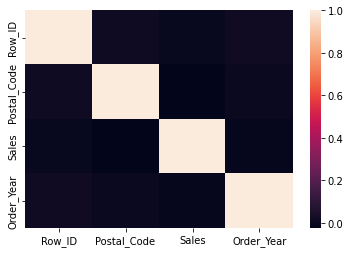

In [ ]:
sns.heatmap(super_store.corr())

# **Models**

## Naivy Bais Model

In [ ]:
# Fitting classifier to the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train,y_train)

# Predicting the Test set results 
y_pred = classifier.predict(X_test)

# Make the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score, precision_score
confusion_matrix(y_test, y_pred)


array([[0, 0, 1, ..., 0, 0, 0],
       [0, 3, 0, ..., 0, 0, 0],
       [1, 1, 5, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]])

In [ ]:
# Evaluate the results
print(f" accuracy score is {accuracy_score(y_test, y_pred)}" )
print(f" precision score is {precision_score(y_test, y_pred, average='macro')}")
print(f" recall score is {recall_score(y_test, y_pred, average='macro')}")
print(f" F1 score is {f1_score(y_test, y_pred, average='macro')}")

 accuracy score is 0.07150153217568948
 precision score is 0.04189171484924968
 recall score is 0.048650052052504986
 F1 score is 0.03945204042715138


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## KNN Model

In [ ]:
# Fitting classifier to the Training set

from sklearn.neighbors import KNeighborsClassifier
kn_model = KNeighborsClassifier(n_neighbors=3 )
kn_model.fit(X_train,y_train)


# Predicting the Test set results 
y_pred = kn_model.predict(X_test)

# Make the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score, precision_score
confusion_matrix(y_test, y_pred)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 4, 1, ..., 0, 0, 0],
       [1, 2, 4, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
print(f" accuracy score is {accuracy_score(y_test, y_pred)}" )
print(f" precision score is {precision_score(y_test, y_pred, average='macro')}")
print(f" recall score is {recall_score(y_test, y_pred, average='macro')}")
print(f" F1 score is {f1_score(y_test, y_pred, average='macro')}")

 accuracy score is 0.07150153217568948
 precision score is 0.04579571039916055
 recall score is 0.042763480265296805
 F1 score is 0.0399134094433509


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## SVM Model

In [ ]:
# Fitting classifier to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel='linear', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results 
y_pred = classifier.predict(X_test)

# Make the Confusion Matrix
confusion_matrix(y_test, y_pred)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 2, 1, ..., 0, 0, 0],
       [1, 0, 3, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]])

In [ ]:
# Evaluate the results

print(f" accuracy score is {accuracy_score(y_test, y_pred)}" )
print(f" precision score is {precision_score(y_test, y_pred, average='macro')}")
print(f" recall score is {recall_score(y_test, y_pred, average='macro')}")
print(f" F1 score is {f1_score(y_test, y_pred, average='macro')}")

 accuracy score is 0.07916241062308478
 precision score is 0.04147523354863133
 recall score is 0.05275722456718213
 F1 score is 0.041698575308689374


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## DecisionTree Model

In [ ]:
# Fitting classifier to the Training set
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion= 'entropy', random_state= 0)
classifier.fit(X_train,y_train)

# Predicting the Test set results 
y_pred = classifier.predict(X_test)

# Make the Confusion Matrix
confusion_matrix(y_test, y_pred)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 1, 1, ..., 0, 0, 0],
       [1, 0, 2, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
# Evaluate the results
 

print(f" accuracy score is {accuracy_score(y_test, y_pred)}" )
print(f" precision score is {precision_score(y_test, y_pred, average='macro')}")
print(f" recall score is {recall_score(y_test, y_pred, average='macro')}")
print(f" F1 score is {f1_score(y_test, y_pred, average='macro')}")

 accuracy score is 0.012257405515832482
 precision score is 0.002213245713716138
 recall score is 0.0019137844975707227
 F1 score is 0.0019866707888110797


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Random Forest Model

In [ ]:
# Random Forest

y_pred = classifier.predict(X_test)

# Fitting classifier to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results 
y_pred = classifier.predict(X_test)

# Make the Confusion Matrix
confusion_matrix(y_test, y_pred)


array([[0, 2, 0, ..., 0, 0, 0],
       [0, 1, 2, ..., 0, 0, 0],
       [0, 5, 2, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:

# Evaluate the results

print(f" accuracy score is {accuracy_score(y_test, y_pred)}" )
print(f" precision score is {precision_score(y_test, y_pred, average='macro')}")
print(f" recall score is {recall_score(y_test, y_pred, average='macro')}")
print(f" F1 score is {f1_score(y_test, y_pred, average='macro')}")

 accuracy score is 0.013278855975485188
 precision score is 0.0011931833616722967
 recall score is 0.0014858235073808995
 F1 score is 0.0011616428235272566


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Result

|Model Name|Accuracy|Precision| Recall|F1 Score|
|:-:|:-:|:-:|:-:|:-:|
|Naivy Bais|0.71|0.41|0.48|0.39|
|KNN|0.71|0.45|0.42|0.39|
|SVM|0.79|0.41|0.52|0.41|
|Decision Tree|0.12|0.02|0.01|0.01
|Random Forest|0.13|0.01|0.01|0.01|

Overall, Based on different models we can observed that **SVM**  is best model for  **Sales Prediction** of **Super Store Dateset** .Because accuracy of SVM Model is the highest compared to other, which is 0.79.

In [ ]:
|